# DEMAND SUPPLY ANALYSIS

<img src="https://fink.hamburg/wp/wp-content/uploads/2019/07/Moia-Daniel-Bockwoldt_dpa.png" alt="my_image" style="width: 2000px;"/>


# Highlights from 19-04-2022 to 31-05-2022  
# Week 16 to 21

In [179]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import datapane as dp
import altair as alt

In [180]:
dp.Group(
     dp.Group(
     dp.BigNumber(
        heading="Week 21 mean demand",
        value="0.194603",
        change="0.009758",
        is_upward_change=True,
    ),
    dp.BigNumber(
        heading="Week 21 mean supply",
        value="0.199573",
        change="0.021741",
        is_upward_change=True,
    ),
    dp.BigNumber(
        heading="Week 17 mean demand",
        value="0.184845",
    ),
    dp.BigNumber(
        heading="Week 17 mean supply",
        value="0.177832",
    ),
    columns=2,
    ),
)

## Detailed analysis below

In [181]:
# import data
data = pd.read_csv(r"/Users/debuchaitu/Desktop/demand_and_supply.csv")

dp.DataTable(data)

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp_utc  1033 non-null   object 
 1   demand         1033 non-null   float64
 2   supply         1033 non-null   float64
dtypes: float64(2), object(1)
memory usage: 24.3+ KB


In [183]:
data.shape

(1033, 3)

In [184]:
#checking if any duplicate row
len(data[data.duplicated() == True])

0

In [185]:
#checking for null
data.isnull().sum()

timestamp_utc    0
demand           0
supply           0
dtype: int64

In [186]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#creating new columns from existing for analysis 
data['timestamp_utc'] = pd.to_datetime(data['timestamp_utc'])
data['Date'] = data['timestamp_utc'].dt.date
data['Time'] = data['timestamp_utc'].dt.time
data['Hour'] = data['timestamp_utc'].dt.hour
data['Weekday'] = data['timestamp_utc'].dt.weekday

def weekday_name(weekday_num):
    days = ['1. Monday', '2. Tuesday', '3. Wednesday', '4. Thursday', '5. Friday', '6. Saturday', '7. Sunday']
    return days[weekday_num]
data['weekday_name'] = data['Weekday'].apply(weekday_name)

data.loc[data['Hour'].between(0,3, inclusive=True),'Timeslot'] = '00 am to 03 am - Mid night'
data.loc[data['Hour'].between(4,6, inclusive=True),'Timeslot'] = '04 am to 06 am - Early morning'
data.loc[data['Hour'].between(7,9, inclusive=True),'Timeslot'] = '07 am to 09 am - Morning'
data.loc[data['Hour'].between(10,11, inclusive=True),'Timeslot'] = '10 am to 11 am - Late morning'
data.loc[data['Hour'].between(12,14, inclusive=True),'Timeslot'] = '12 pm to 14 pm - Afternoon'
data.loc[data['Hour'].between(15,17, inclusive=True),'Timeslot'] = '15 pm to 17 pm - Late afternoon'
data.loc[data['Hour'].between(18,20, inclusive=True),'Timeslot'] = '18 pm to 20 pm - Evening'
data.loc[data['Hour'].between(21,23, inclusive=True),'Timeslot'] = '21 pm to 23 pm - Night'

data.loc[data['Weekday'].between(0,4, inclusive=True),'Day'] = 'Weekday'
data.loc[data['Weekday'].between(5,6, inclusive=True),'Day'] = 'Weekend'
data['Week_number'] = data['timestamp_utc'].dt.week

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1033 entries, 0 to 1032
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp_utc  1033 non-null   datetime64[ns]
 1   demand         1033 non-null   float64       
 2   supply         1033 non-null   float64       
 3   Date           1033 non-null   object        
 4   Time           1033 non-null   object        
 5   Hour           1033 non-null   int64         
 6   Weekday        1033 non-null   int64         
 7   weekday_name   1033 non-null   object        
 8   Timeslot       1033 non-null   object        
 9   Day            1033 non-null   object        
 10  Week_number    1033 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 88.9+ KB


In [188]:
dp.DataTable(data)

In [189]:
# overall trend of avg demand and supply over given period of time
daily_demand = data.groupby('Date')['demand'].mean().reset_index(name='mean_demand')
daily_demand['Date']=daily_demand['Date'].astype(str)

# Create the line chart
line_chart = alt.Chart(daily_demand).mark_line(color='#4C78A8').encode(
    x='Date',
    y='mean_demand',
    tooltip=['Date', 'mean_demand']
)

chart1 = line_chart.properties(
    title='Daily avg demand trend', width=1000, height=300
)

######
daily_supply = data.groupby('Date')['supply'].mean().reset_index(name='mean_supply')
daily_supply['Date']=daily_supply['Date'].astype(str)

# Create the line chart
line_chart = alt.Chart(daily_supply).mark_line(color='#F1853B').encode(
    x='Date',
    y='mean_supply',
    tooltip=['Date', 'mean_supply']
)

chart2 = line_chart.properties(
    title='Daily avg supply trend', width=1000, height=300
)

#####

combined_chart = (chart1 + chart2).properties(title='Daily avg demand and supply trend', width=1000, height=300)

dp.Select(
    blocks=[
                dp.Plot(combined_chart, label='Daily avg demand and supply trend'),
                dp.Plot(chart1, label='Daily avg demand trend'), 
                dp.Plot(chart2, label='Daily avg supply trend'),
           ]
         )
#click on tabs below to check the one you want to focus on

In [190]:
# Demand and supply analysis based on weeks, days, hours, etc

# based on week numbers
demand_supply_week = data.groupby('Week_number')['demand'].mean().reset_index(name='Mean_demand')
s=data.groupby('Week_number')['supply'].mean().reset_index(name='Mean_supply') 
demand_supply_week = demand_supply_week.merge(s, on = ['Week_number'])


# Create a clustered column chart using Altair
final_demand_supply_week = pd.melt(demand_supply_week, id_vars=['Week_number'], value_vars=['Mean_demand', 'Mean_supply'])

chart3 = alt.Chart(final_demand_supply_week).mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('Week_number:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    x =alt.X('variable', sort = ['Mean_demand', 'Mean_supply'],  axis=None),
    y =alt.Y('value:Q'),
    color= alt.Color('variable'),
    tooltip=[alt.Tooltip('Week_number', title='Week_number'), alt.Tooltip('value:Q', title='Value')]
).properties(
    title=alt.TitleParams(text='Weekly mean Demand and Supply Comparison', anchor='middle'),width=55, height=300
).configure_view(stroke='transparent')

chart3.display()
#####

# based on day - weekend or weekdays
demand_supply_d = data.groupby('Day')['demand'].mean().reset_index(name='Mean_demand')
d=data.groupby('Day')['supply'].mean().reset_index(name='Mean_supply') 
demand_supply_d = demand_supply_d.merge(d, on = ['Day'])

# Create a clustered column chart using Altair
final_demand_supply_d = pd.melt(demand_supply_d, id_vars=['Day'], value_vars=['Mean_demand', 'Mean_supply'])

chart4 = alt.Chart(final_demand_supply_d).mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('Day:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    x =alt.X('variable', sort = ['Mean_demand', 'Mean_supply'],  axis=None),
    y =alt.Y('value:Q'),
    color= alt.Color('variable'),
    tooltip=[alt.Tooltip('Day', title='Day type'), alt.Tooltip('value:Q', title='Value')]
).properties(
    title=alt.TitleParams(text='Weekdays and Weekend mean Demand and Supply Comparison', anchor='middle'),width=55, height=300
).configure_view(stroke='transparent')

chart4.display()
######

# based on days of the week
demand_supply_weekday = data.groupby('weekday_name')['demand'].mean().reset_index(name='Mean_demand')
w=data.groupby('weekday_name')['supply'].mean().reset_index(name='Mean_supply') 
demand_supply_weekday = demand_supply_weekday.merge(w, on = ['weekday_name'])

# Create a clustered column chart using Altair
final_demand_supply_weekday = pd.melt(demand_supply_weekday, id_vars=['weekday_name'], value_vars=['Mean_demand', 'Mean_supply'])

chart5 = alt.Chart(final_demand_supply_weekday).mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('weekday_name:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    x =alt.X('variable', sort = ['Mean_demand', 'Mean_supply'],  axis=None),
    y =alt.Y('value:Q'),
    color= alt.Color('variable'),
    tooltip=[alt.Tooltip('weekday_name', title='Day'), alt.Tooltip('value:Q', title='Value')]

).properties(
    title=alt.TitleParams(text='Monday to Sunday mean Demand and Supply Comparison', anchor='middle'),width=65, height=300
).configure_view(stroke='transparent')

chart5.display()
#####

# based on timeslot
demand_supply_ts = data.groupby('Timeslot')['demand'].mean().reset_index(name='Mean_demand')
t=data.groupby('Timeslot')['supply'].mean().reset_index(name='Mean_supply') 
demand_supply_ts = demand_supply_ts.merge(t, on = ['Timeslot'])

# Create a clustered column chart using Altair
final_demand_supply_ts = pd.melt(demand_supply_ts, id_vars=['Timeslot'], value_vars=['Mean_demand', 'Mean_supply'])

chart6 = alt.Chart(final_demand_supply_ts).mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('Timeslot:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    x =alt.X('variable', sort = ['Mean_demand', 'Mean_supply'],  axis=None),
    y =alt.Y('value:Q'),
    color= alt.Color('variable'),
    tooltip=[alt.Tooltip('Timeslot', title='Timeslot'), alt.Tooltip('value:Q', title='Value')]
).properties(
    title=alt.TitleParams(text='Timeslot based mean Demand and Supply Comparison', anchor='middle'),width=135, height=300
).configure_view(stroke='transparent')

chart6.display()
######

# based on hours
hourly_mean = data.groupby('Hour')['demand'].mean().reset_index(name='Mean_demand') 
ms=data.groupby('Hour')['supply'].mean().reset_index(name='Mean_supply') 
hourly_mean = hourly_mean.merge(ms, on = ['Hour'])
hourly_mean['Gap']=hourly_mean['Mean_demand']-hourly_mean['Mean_supply'] #Gap = demand - supply

# Create a clustered column chart using Altair
final_hourly_mean = pd.melt(hourly_mean, id_vars=['Hour'], value_vars=['Mean_demand', 'Mean_supply','Gap'])

chart7 = alt.Chart(final_hourly_mean).mark_bar(
    opacity=1,
    ).encode(
    column = alt.Column('Hour:O', spacing = 5, header = alt.Header(labelOrient = "bottom")),
    x =alt.X('variable', sort = ["Mean_demand", "Mean_supply",'Gap'],  axis=None),
    y =alt.Y('value:Q'),
    color=alt.Color('variable', scale=alt.Scale(domain=['Mean_demand', 'Mean_supply', 'Gap'], range=['#4C78A8', '#F1853B', 'red'])),
    tooltip=[alt.Tooltip('Hour', title='Hour'), alt.Tooltip('value:Q', title='Value')]
).properties(
    title=alt.TitleParams(text='Hourly avg demand and supply trend', anchor='middle'),width=41, height=300
).configure_view(stroke='transparent')

chart7.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

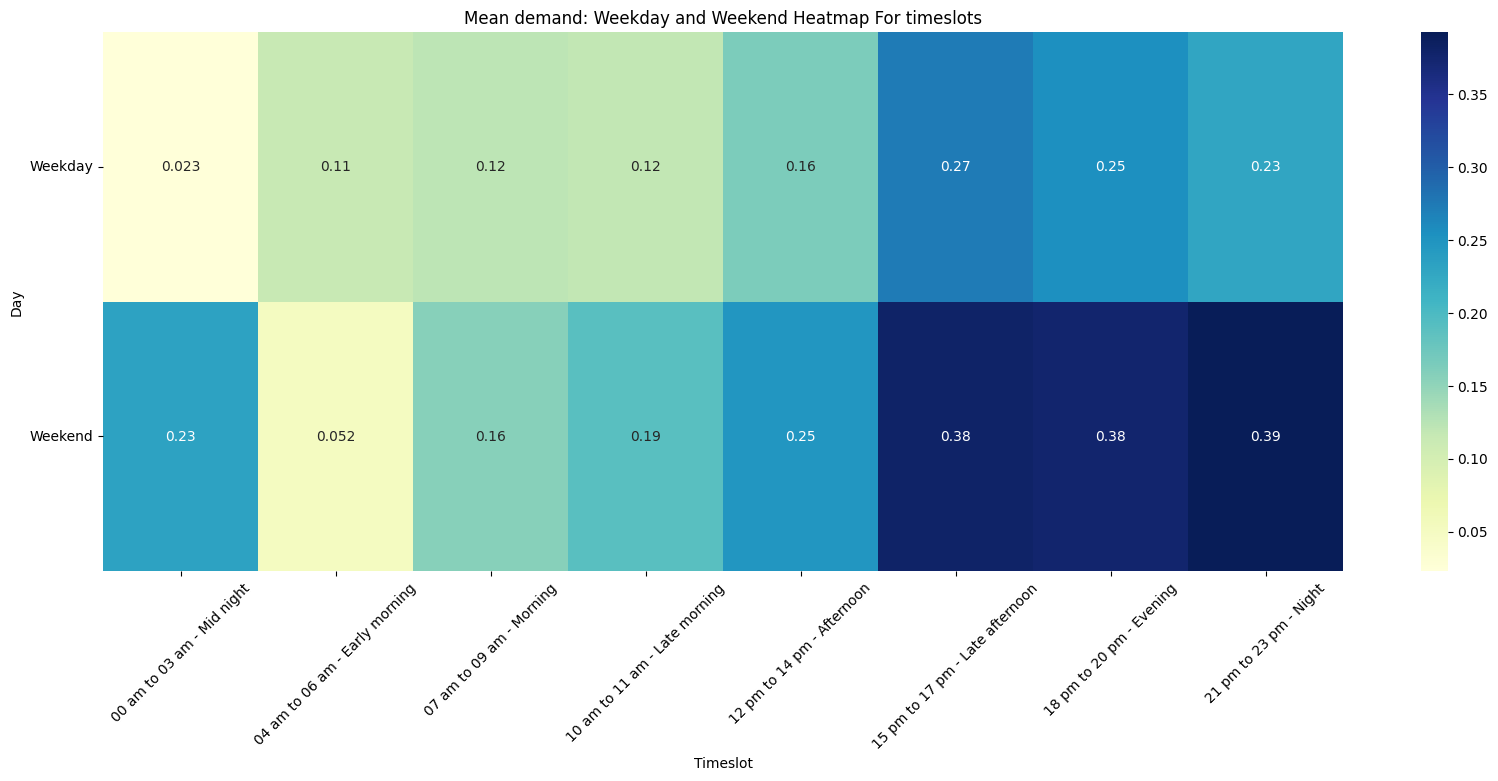

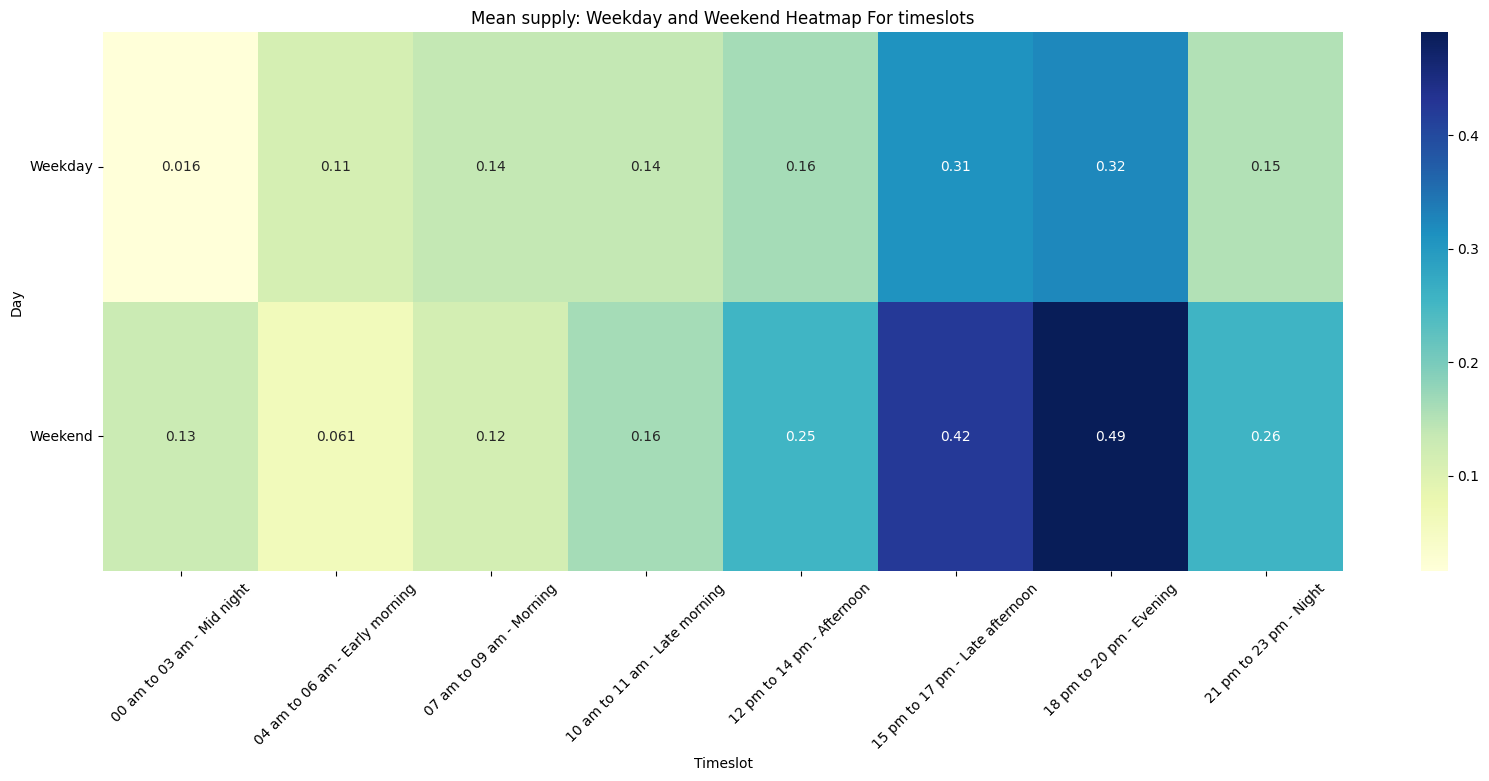

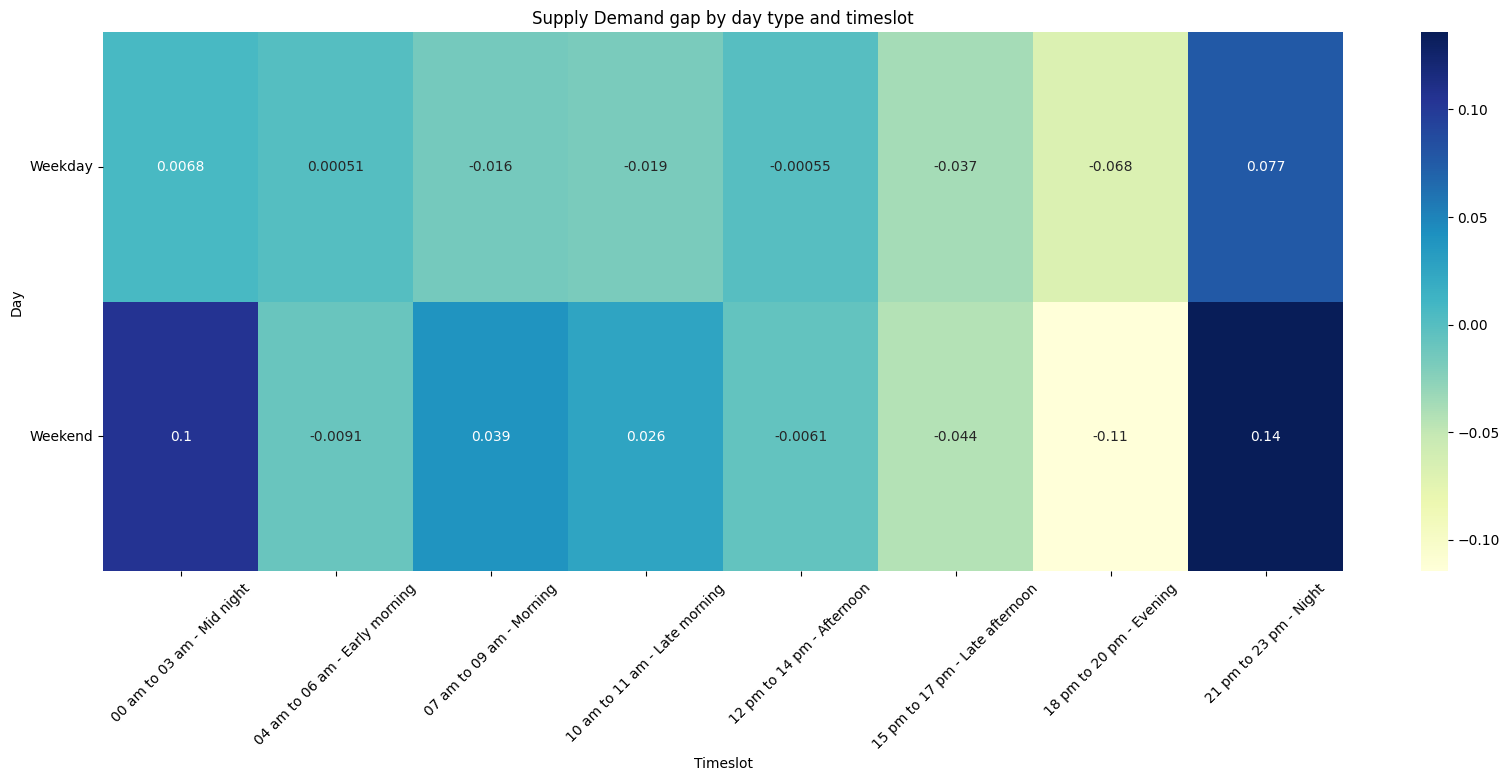

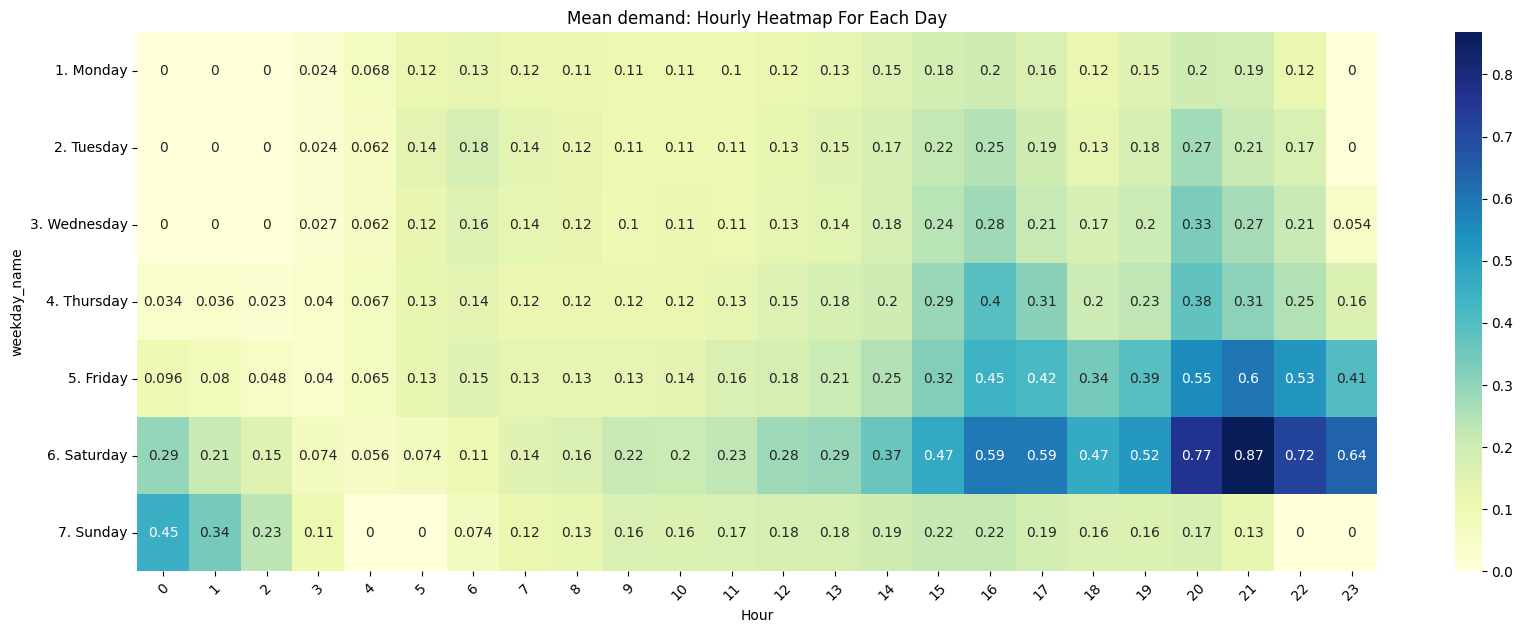

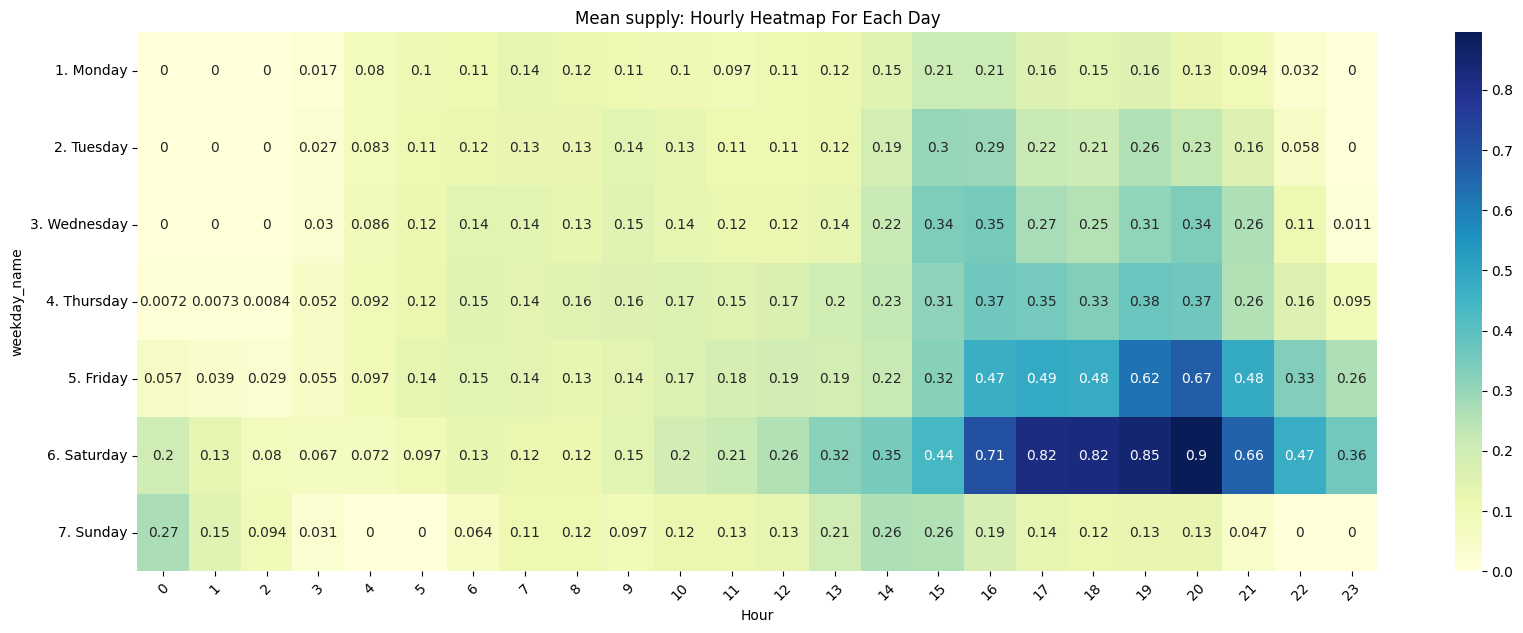

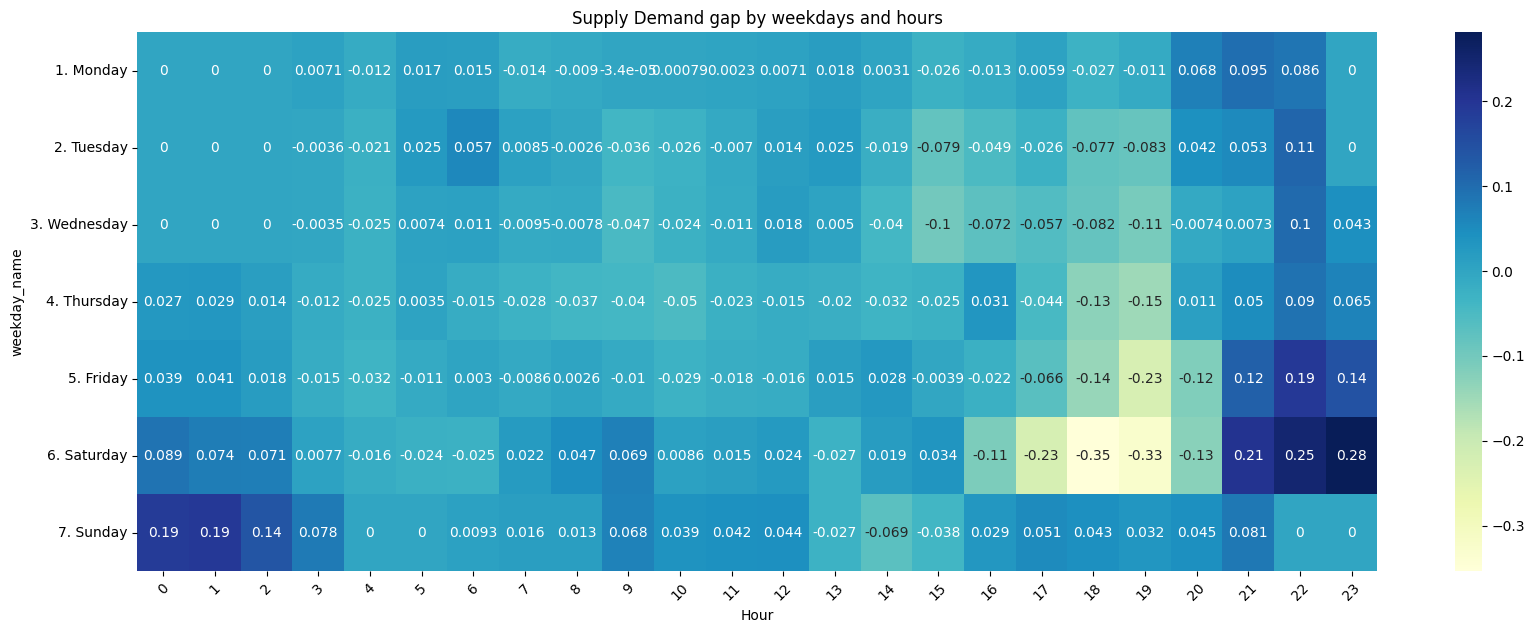

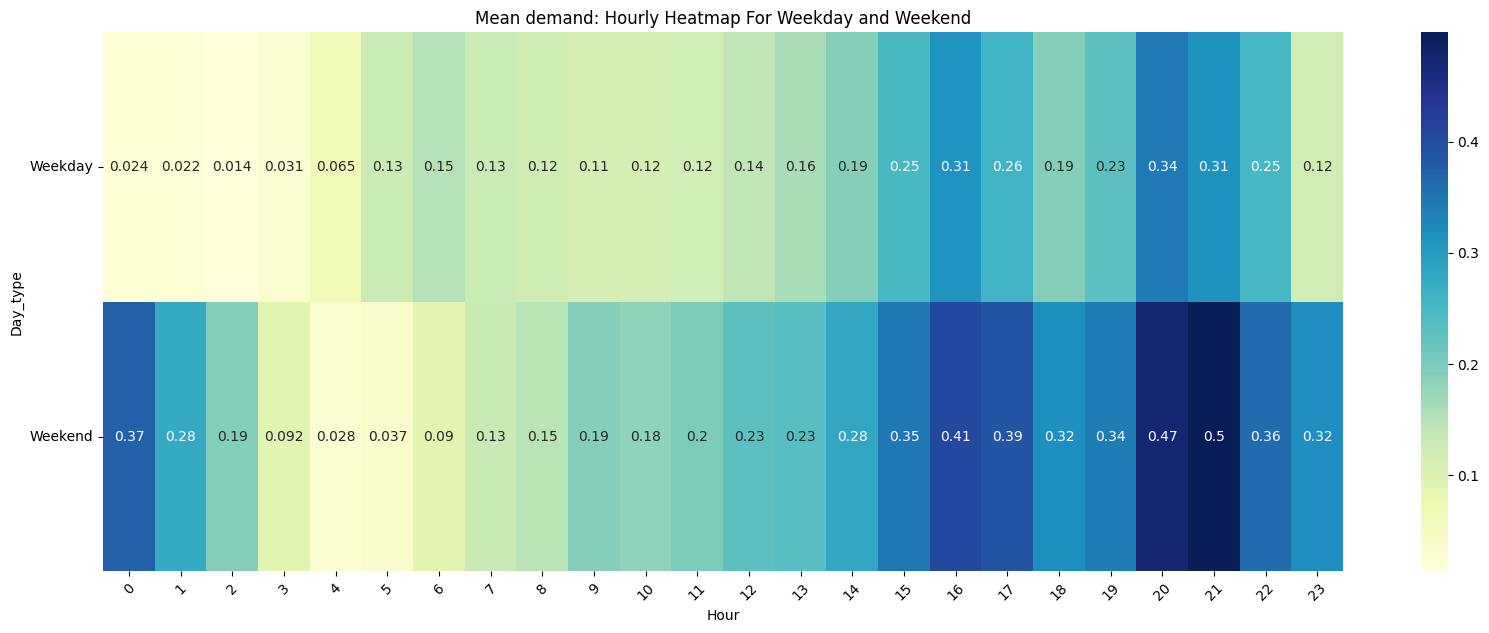

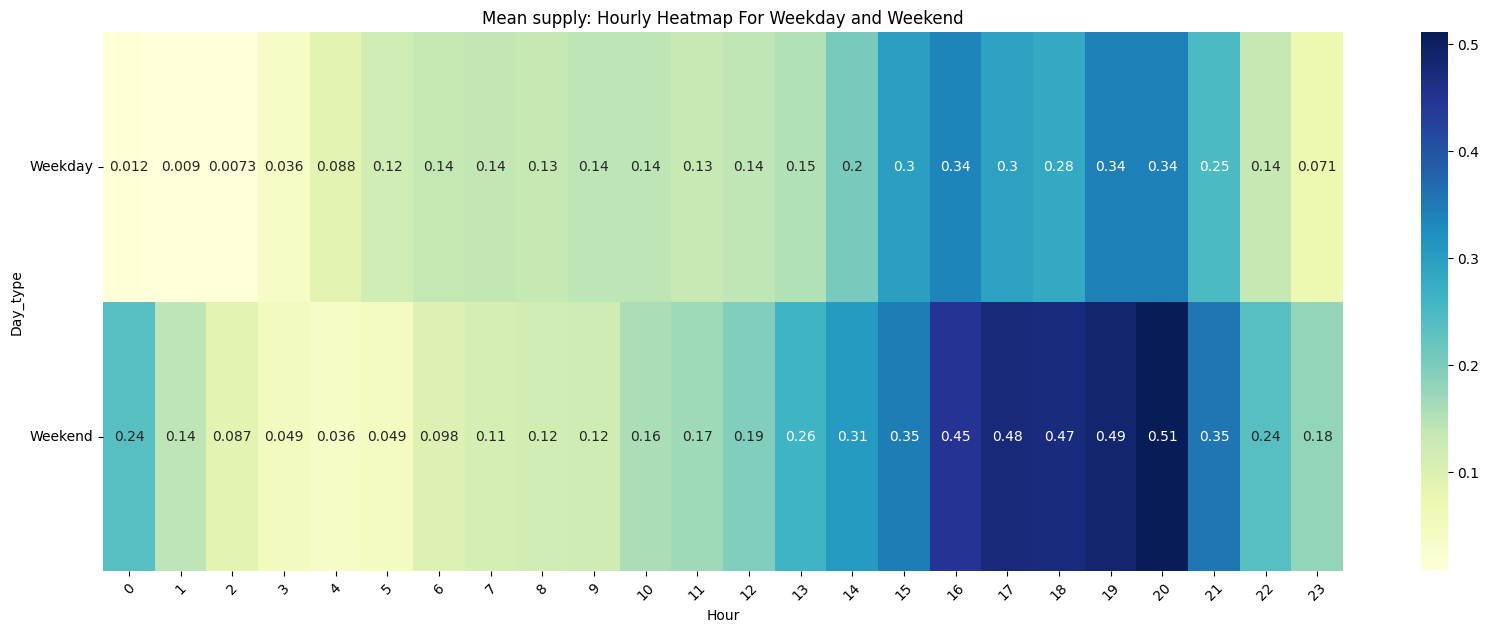

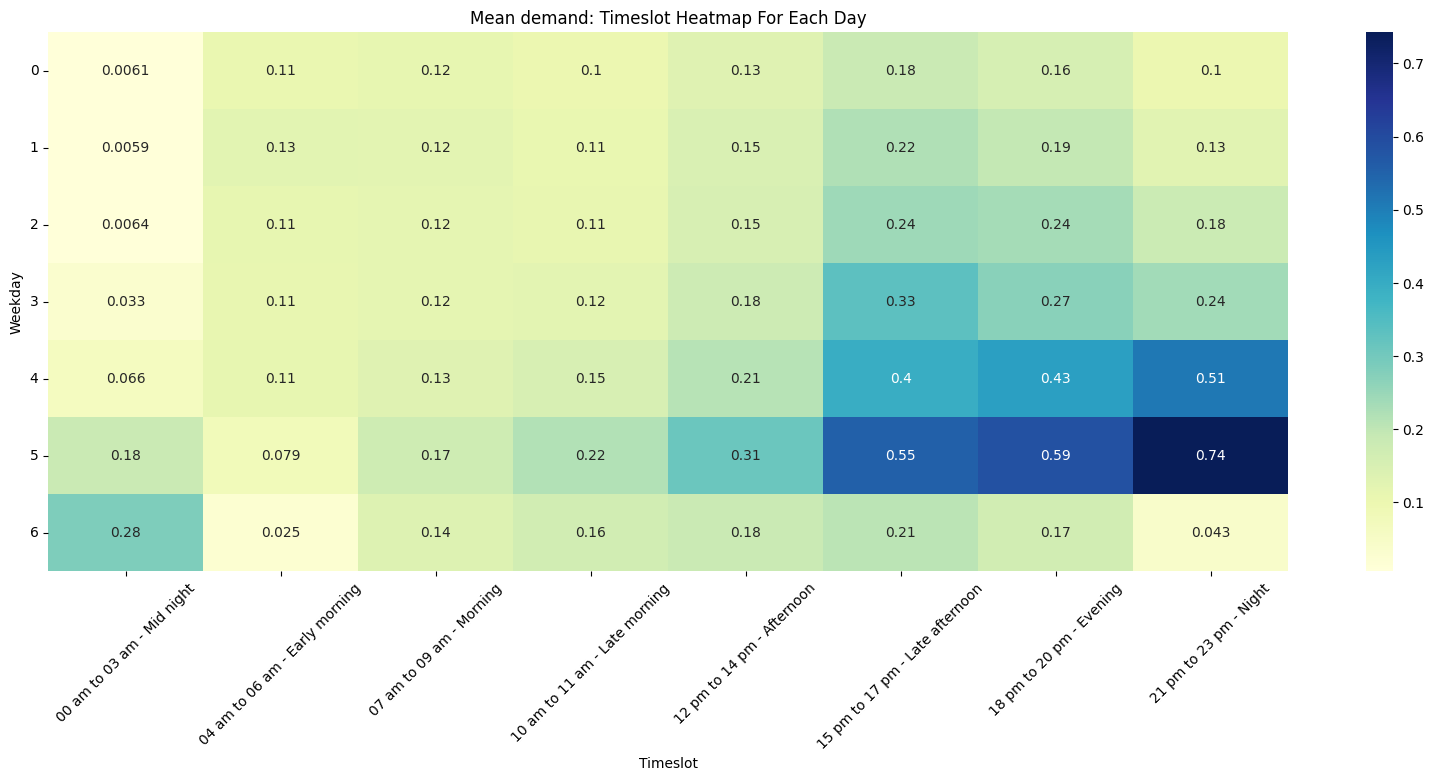

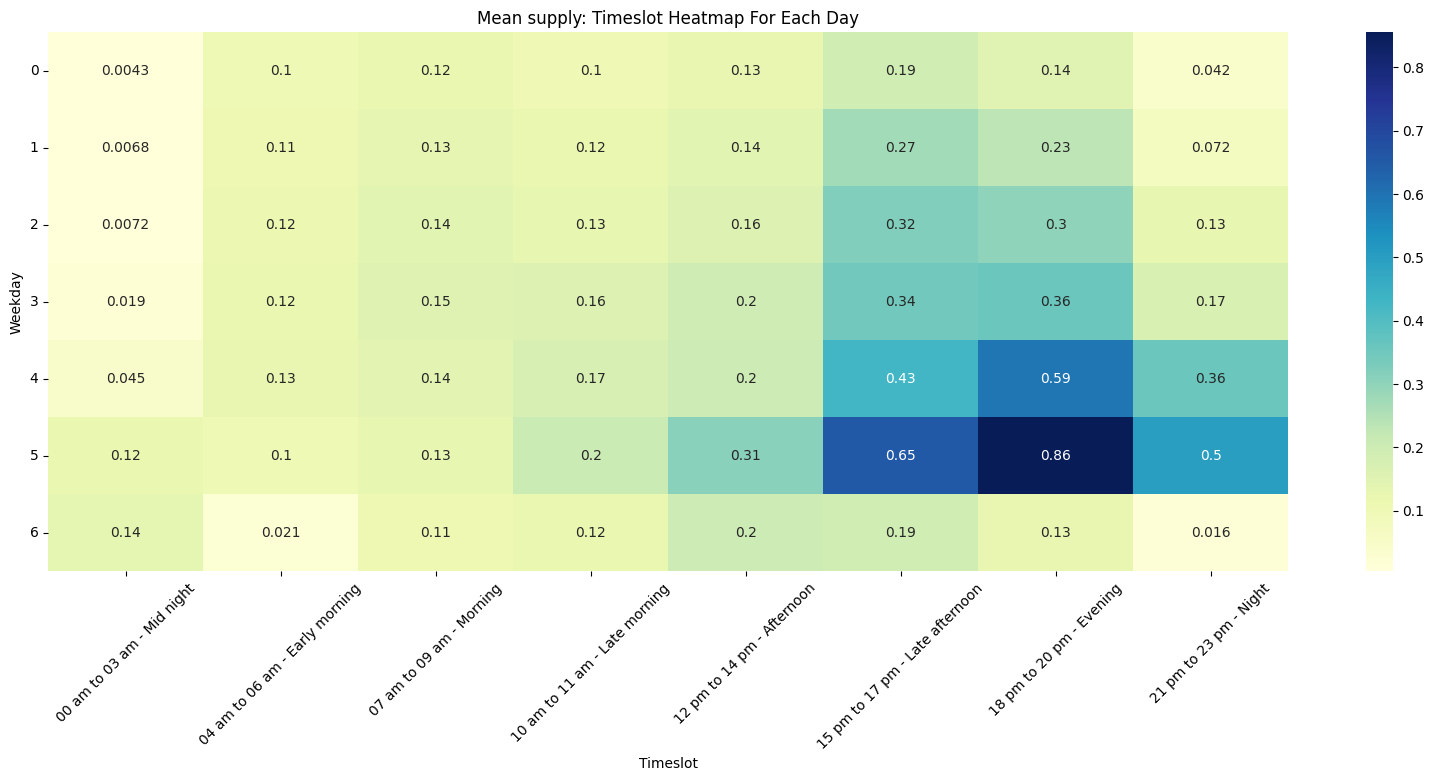

alt.LayerChart(...)

In [191]:
# identifying hotspots in detail

def heatmap(df, index_col, col_col, val_col,title):
    fig, ax = plt.subplots(figsize=(20,7))
    plt.title(title)
    pivot_df = df.pivot(index=index_col, columns=col_col, values=val_col)
    sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.show()
    
#Heatmap data for supply, demand, gap with day types and timeslots
heat_d_t_gap = data.groupby(['Day','Timeslot'])['demand'].mean().reset_index(name='Mean_demand')
dt=data.groupby(['Day','Timeslot'])['supply'].mean().reset_index(name='Mean_supply') 
heat_d_t_gap = heat_d_t_gap.merge(dt, on = ['Day','Timeslot'])
heat_d_t_gap['Gap']=heat_d_t_gap['Mean_demand']-heat_d_t_gap['Mean_supply']                  #Gap = demand - supply
heatmap(heat_d_t_gap,'Day', 'Timeslot','Mean_demand', 'Mean demand: Weekday and Weekend Heatmap For timeslots')
heatmap(heat_d_t_gap,'Day', 'Timeslot','Mean_supply', 'Mean supply: Weekday and Weekend Heatmap For timeslots')
heatmap(heat_d_t_gap,'Day', 'Timeslot','Gap', 'Supply Demand gap by day type and timeslot')

#Heatmap data for supply, demand, gap with day names and hours
heat_wn_h_gap = data.groupby(['weekday_name','Hour'])['demand'].mean().reset_index(name='Mean_demand')
wnh=data.groupby(['weekday_name','Hour'])['supply'].mean().reset_index(name='Mean_supply') 
heat_wn_h_gap = heat_wn_h_gap.merge(wnh, on = ['weekday_name','Hour'])
heat_wn_h_gap['Gap']=heat_wn_h_gap['Mean_demand']-heat_wn_h_gap['Mean_supply']                 #Gap = demand - supply
heatmap(heat_wn_h_gap,'weekday_name', 'Hour','Mean_demand', 'Mean demand: Hourly Heatmap For Each Day')
heatmap(heat_wn_h_gap,'weekday_name', 'Hour','Mean_supply', 'Mean supply: Hourly Heatmap For Each Day')
heatmap(heat_wn_h_gap,'weekday_name', 'Hour','Gap', 'Supply Demand gap by weekdays and hours')

#Heatmap data for demand with days and hours
heat_data_demand_dh = data.groupby(['Day', 'Hour'])['demand'].mean().reset_index()
heat_data_demand_dh.columns = ['Day_type', 'Hour','Mean']
heatmap(heat_data_demand_dh,'Day_type', 'Hour','Mean', 'Mean demand: Hourly Heatmap For Weekday and Weekend')

#Heatmap data for supply with days and hours
heat_data_supply_dh = data.groupby(['Day', 'Hour'])['supply'].mean().reset_index()
heat_data_supply_dh.columns = ['Day_type', 'Hour','Mean']
heatmap(heat_data_supply_dh,'Day_type', 'Hour','Mean', 'Mean supply: Hourly Heatmap For Weekday and Weekend')

#Heatmap data for demand with weekdays and timeslots
heat_data_demand_wt = data.groupby(['Weekday', 'Timeslot'])['demand'].mean().reset_index()
heat_data_demand_wt.columns = ['Weekday', 'Timeslot','Mean']
heatmap(heat_data_demand_wt,'Weekday', 'Timeslot','Mean', 'Mean demand: Timeslot Heatmap For Each Day')


#Heatmap data for supply with weekdays and timeslots
heat_data_supply_wt = data.groupby(['Weekday', 'Timeslot'])['supply'].mean().reset_index()
heat_data_supply_wt.columns = ['Weekday', 'Timeslot','Mean']
heatmap(heat_data_supply_wt,'Weekday', 'Timeslot','Mean', 'Mean supply: Timeslot Heatmap For Each Day')

hm1 = alt.Chart(heat_wn_h_gap).mark_rect().encode(
    x=alt.X('Hour:O', axis=alt.Axis(title='Hour')),
    y=alt.Y('weekday_name:O', axis=alt.Axis(title='Weekday')),
    color=alt.Color('Gap:Q', scale=alt.Scale(scheme='blues'))
)

# Add text mark for data labels
text1 = alt.Chart(heat_wn_h_gap).mark_text(baseline='middle', dx=5).encode(
    x=alt.X('Hour:O', axis=alt.Axis(title='Hour')),
    y=alt.Y('weekday_name:O', axis=alt.Axis(title='Weekday')),
    text=alt.Text('Gap:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Gap > heat_wn_h_gap['Gap'].mean(),
        alt.value('white'),
        alt.value('black')
    )
)

chm1 = (hm1 + text1).properties(
    width=900,
    height=400,
    title='Supply Demand gap by weekdays and hours'
)

# Display chart
chm1


hm2 = alt.Chart(heat_d_t_gap).mark_rect().encode(
    x=alt.X('Timeslot:O', axis=alt.Axis(title='Timeslot')),
    y=alt.Y('Day:O', axis=alt.Axis(title='Day')),
    color=alt.Color('Gap:Q', scale=alt.Scale(scheme='blues'))
)

# Add text mark for data labels
text2 = alt.Chart(heat_d_t_gap).mark_text(baseline='middle', dx=5).encode(
    x=alt.X('Timeslot:O', axis=alt.Axis(title='Timeslot')),
    y=alt.Y('Day:O', axis=alt.Axis(title='Day')),
    text=alt.Text('Gap:Q', format='.2f'),
    color=alt.condition(
        alt.datum.Gap > heat_d_t_gap['Gap'].mean(),
        alt.value('white'),
        alt.value('black')
    )
)

chm2 = (hm2 + text2).properties(
    width=900,
    height=400,
    title='Supply Demand gap by day type and timeslot'
)

# Display chart
chm2



In [192]:
# finding correlation
corr_coeff = round(data["demand"].corr(data["supply"]), 4)

dp.Text(f"The correlation coefficient between 'Demand' and 'Supply' is {corr_coeff}")


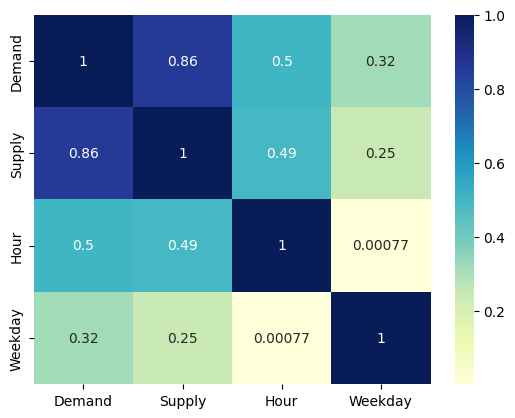

In [193]:
hm_df = pd.DataFrame()
hm_df[['Demand','Supply','Hour','Weekday']] = data[['demand','supply','Hour','Weekday']]

# calculate the correlation coefficient
corr = hm_df.corr()

# plot the heatmap
abc = sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()




In [194]:
#statistical insights
new_df = pd.DataFrame()
new_df[['demand','supply','weekday_name','Timeslot','Day_type','Hour','Week_number']] = data[['demand','supply','weekday_name','Timeslot','Day','Hour','Week_number']]

def create_boxplot(df, x_col, y_col, title=None):
    if y_col == 'supply':
        colors = ['#F1853B']
    else:
        colors = ['#4C78A8']
    # create boxplot
    boxplot = alt.Chart(df).mark_boxplot().encode(
        y=alt.Y(f'{y_col}:Q', axis=alt.Axis(title=y_col)),
        x=alt.X(f'{x_col}:N', axis=alt.Axis(title=x_col, labelAngle=315)),
        color=alt.Color(value=colors[0]) if y_col == 'supply' else alt.Color(f'{x_col}:N', legend=None, scale=alt.Scale(range=colors))
    )
    # set graph title if provided
    if title:
        boxplot = boxplot.properties(title=title)
    # reset size limit
    boxplot = boxplot.properties(width=alt.Step(40), height=alt.Step(80))
    return boxplot

bx1=create_boxplot(new_df,'weekday_name','demand','Demand statistics per week day')
bx2=create_boxplot(new_df,'weekday_name','supply','Supply statistics per week day')
bx3=create_boxplot(new_df,'Timeslot','demand','Demand statistics per timeslot')
bx4=create_boxplot(new_df,'Timeslot','supply','Supply statistics per timeslot')
bx5=create_boxplot(new_df,'Day_type','demand','Demand statistics per day type')
bx6=create_boxplot(new_df,'Day_type','supply','Supply statistics per day type')
bx7=create_boxplot(new_df,'Hour','demand','Demand statistics per hour')
bx8=create_boxplot(new_df,'Hour','supply','Supply statistics per hour')
bx9=create_boxplot(new_df,'Week_number','demand','Demand statistics per week')
bx10=create_boxplot(new_df,'Week_number','supply','Supply statistics per week')

dp.Select(
    blocks=[ 
            dp.Group(
                dp.Plot(bx9, label='Statistics per week'), 
                dp.Plot(bx10, label='Statistics per week'),
                columns=2
            ),
            dp.Group(
                dp.Plot(bx5, label='Statistics per day type'), 
                dp.Plot(bx6, label='Statistics per day type'),
                columns=2
            ),
            dp.Group(
                dp.Plot(bx1, label='Statistics per Week day'), 
                dp.Plot(bx2, label='Statistics per Week day'),
                columns=2
            ),
            dp.Group(
                dp.Plot(bx3, label='Statistics per timeslot'), 
                dp.Plot(bx4, label='Statistics per timeslot'),
                columns=2
            ),
            dp.Group(
                dp.Plot(bx7, label='Statistics per hour'), 
                dp.Plot(bx8, label='Statistics per hour'),
                columns=2
            ),
            
    ]
)

#click on tabs below to check the one you want to focus on
#Page 1 - Statistics per week
#Page 2 - Statistics per day type
#Page 3 - Statistics per Week day
#Page 4 - Statistics per timeslot
#Page 5 - Statistics per hour


In [195]:
#p95 calculations for more understanding

demand_calcs_ts = pd.DataFrame()
demand_calcs_ts['demand_mean'] = data.groupby('Timeslot')[['demand']].mean()
demand_calcs_ts['demand_median'] = data.groupby('Timeslot')['demand'].median()
demand_calcs_ts['demand_p95_hour'] = data.groupby('Timeslot')['demand'].quantile(0.95)
demand_calcs_ts['demand_min'] = data.groupby('Timeslot')['demand'].min()
demand_calcs_ts['demand_max'] = data.groupby('Timeslot')['demand'].max()

# Reset the index and melt the dataframe
data_ts = demand_calcs_ts.reset_index().melt('Timeslot')

Chart11 = alt.Chart(data_ts, width=800, height=300).mark_line(point=True).encode(
    x=alt.X('Timeslot', title='Time slot', axis=alt.Axis(labelAngle=315)),
    y=alt.Y('value', title='Value'),
    color=alt.Color('variable', legend=alt.Legend(title='Demand')),
    tooltip=['Timeslot', 'value', 'variable']
)

#######

supply_calcs_ts = pd.DataFrame()
supply_calcs_ts['supply_mean'] = data.groupby('Timeslot')[['supply']].mean()
supply_calcs_ts['supply_median'] = data.groupby('Timeslot')['supply'].median()
supply_calcs_ts['supply_p95_hour'] = data.groupby('Timeslot')['supply'].quantile(0.95)
supply_calcs_ts['supply_min'] = data.groupby('Timeslot')['supply'].min()
supply_calcs_ts['supply_max'] = data.groupby('Timeslot')['supply'].max()

# Reset the index and melt the dataframe
data_tss = supply_calcs_ts.reset_index().melt('Timeslot')

Chart12 = alt.Chart(data_tss, width=800, height=300).mark_line(point=True).encode(
    x=alt.X('Timeslot', title='Timeslot', axis=alt.Axis(labelAngle=315)),
    y=alt.Y('value', title='Value'),
    color=alt.Color('variable', legend=alt.Legend(title='Supply')),
    tooltip=['Timeslot', 'value', 'variable']
)

#######
dp.Select(
    blocks=[
                dp.Group(
                    dp.Plot(Chart11, label='Demand statistics based on timeslot'), 
                    dp.Plot(Chart12, label='Supply statistics based on timeslot'),
                    columns=2, name='Grouped'
                    ),
                dp.Plot(Chart11, label='Demand statistics based on timeslot'), 
                dp.Plot(Chart12, label='Supply statistics based on timeslot'),
           ]
         )

#click on tabs below to check the one you want to focus on

In [196]:
demand_calcs_hr = pd.DataFrame()
demand_calcs_hr['demand_mean'] = data.groupby('Hour')[['demand']].mean()
demand_calcs_hr['demand_median'] = data.groupby('Hour')['demand'].median()
demand_calcs_hr['demand_p95_hour'] = data.groupby('Hour')['demand'].quantile(0.95)
demand_calcs_hr['demand_min'] = data.groupby('Hour')['demand'].min()
demand_calcs_hr['demand_max'] = data.groupby('Hour')['demand'].max()

# Reset the index and melt the dataframe
data_hr = demand_calcs_hr.reset_index().melt('Hour')

Chart13 = alt.Chart(data_hr, width=800, height=300).mark_line(point=True).encode(
    x=alt.X('Hour', title='Hour'),
    y=alt.Y('value', title='Value'),
    color=alt.Color('variable', legend=alt.Legend(title='Demand')),
    tooltip=['Hour', 'value', 'variable']
)

######

supply_calcs_hr = pd.DataFrame()
supply_calcs_hr['supply_mean'] = data.groupby('Hour')[['supply']].mean()
supply_calcs_hr['supply_median'] = data.groupby('Hour')['supply'].median()
supply_calcs_hr['supply_p95_hour'] = data.groupby('Hour')['supply'].quantile(0.95)
supply_calcs_hr['supply_min'] = data.groupby('Hour')['supply'].min()
supply_calcs_hr['supply_max'] = data.groupby('Hour')['supply'].max()

# Reset the index and melt the dataframe
data_hrs = supply_calcs_hr.reset_index().melt('Hour')

Chart14 = alt.Chart(data_hrs, width=800, height=300).mark_line(point=True).encode(
    x=alt.X('Hour', title='Hour'),
    y=alt.Y('value', title='Value'),
    color=alt.Color('variable', legend=alt.Legend(title='Supply')),
    tooltip=['Hour', 'value', 'variable']
)
#######
dp.Select(
    blocks=[
                dp.Group(
                    dp.Plot(Chart13, label='Hourly demand statistics'), 
                    dp.Plot(Chart14, label='Hourly supply statistics'),
                    columns=2, name='Both'
                    ),
                dp.Plot(Chart13, label='Hourly demand statistics'), 
                dp.Plot(Chart14, label='Hourly supply statistics'),
           ]
         )

#click on tabs below to check the one you want to focus on

# THANK YOU

In [210]:
report = dp.View(
                  dp.Text("# MOIA - DEMAND SUPPLY ANALYSIS"), 
                  dp.Text('## Highlights from 19-04-2022 to 31-05-2022'),
                  dp.Text('## Week 16 to 21'),
                  dp.Group(
                             dp.Group(
                             dp.BigNumber(
                                heading="Week 21 mean demand",
                                value="0.194603",
                                change="0.009758",
                                is_upward_change=True,
                            ),
                            dp.BigNumber(
                                heading="Week 21 mean supply",
                                value="0.199573",
                                change="0.021741",
                                is_upward_change=True,
                            ),
                            dp.BigNumber(
                                heading="Week 17 mean demand",
                                value="0.184845",
                            ),
                            dp.BigNumber(
                                heading="Week 17 mean supply",
                                value="0.177832",
                            ),
                            columns=2,
                            ),
                        ),
                  dp.Text('## Detailed analysis below'),
                  dp.DataTable(data),
                  dp.Text('### Each day mean demand and supply trend '),
                  dp.Select(
                    blocks=[
                                dp.Plot(combined_chart, label='Each day mean demand and supply trend'),
                                dp.Plot(chart1, label='Each day mean demand trend'), 
                                dp.Plot(chart2, label='Each day mean supply trend'),
                           ]
                         ),
                          dp.Text('### Mean demand and supply comparison'),
                  dp.Select(
                   blocks=[
                                dp.Plot(chart3, responsive=False, label='Weekly mean demand and supply comparison'),
                                dp.Plot(chart4, responsive=False, label='Weekdays and weekend mean demand and supply comparison'), 
                                dp.Plot(chart5, responsive=False, label='Monday to Sunday mean demand and supply comparison'),
                                dp.Plot(chart6, responsive=False, label='Timeslot based mean demand and supply comparison'),
                                dp.Plot(chart7, responsive=False, label='Hourly mean demand and supply trend'),
                           ],
                            type=dp.SelectType.DROPDOWN,
                         ),
                              dp.Text('### Mean demand and supply gap analysis'),
                   dp.Select(
                        blocks=[
                                dp.Plot(chm2, label='Demand and supply gap by day type and timeslot'),
                                dp.Plot(chm1, label='Demand and supply gap by weekdays and hours'),
                           ],
                    ),
                   dp.Text(f"### The correlation coefficient between 'Demand' and 'Supply' is {corr_coeff}"),
                   dp.Group(                
                     dp.Plot(abc),
                     columns=2
                      ),
                   dp.Text('### Demand and supply statistics'),
                   dp.Select(
                        blocks=[ 
                            dp.Group(
                                dp.Plot(bx9, label='Statistics per week'), 
                                dp.Plot(bx10, label='Statistics per week'),
                                columns=2, label = 'Per week'
                            ),
                            dp.Group(
                                dp.Plot(bx5, label='Statistics per day type'), 
                                dp.Plot(bx6, label='Statistics per day type'),
                                columns=2, label = 'Per day type'
                            ),
                            dp.Group(
                                dp.Plot(bx1, label='Statistics per Week day'), 
                                dp.Plot(bx2, label='Statistics per Week day'),
                                columns=2, label = 'Per week day'
                            ),
                            dp.Group(
                                dp.Plot(bx3, label='Statistics per timeslot'), 
                                dp.Plot(bx4, label='Statistics per timeslot'),
                                columns=2, label = 'Per timeslot'
                            ),
                            dp.Group(
                                dp.Plot(bx7, label='Statistics per hour'), 
                                dp.Plot(bx8, label='Statistics per hour'),
                                columns=2, label = 'Per hour'
                            ),
                        ]
                    ),
                    dp.Select(
                    blocks=[
                                dp.Group(
                                    dp.Plot(Chart11, label='Demand statistics per timeslot'), 
                                    dp.Plot(Chart12, label='Supply statistics per timeslot'),
                                    columns=2, label = 'Demand and supply statistics'
                                    ),
                                dp.Plot(Chart11, label='Demand statistics per timeslot'), 
                                dp.Plot(Chart12, label='Supply statistics per timeslot'),
                           ]
                         ),
                    dp.Select(
                    blocks=[
                                dp.Group(
                                    dp.Plot(Chart13, label='Hourly demand statistics'), 
                                    dp.Plot(Chart14, label='Hourly supply statistics'),
                                    columns=2, label = 'Demand and supply statistics'
                                    ),
                                dp.Plot(Chart13, label='Hourly demand statistics'), 
                                dp.Plot(Chart14, label='Hourly supply statistics'),
                           ]
                         )
    
)

dp.save_report(report, path='Moia.html')


App saved to ./Moia.html